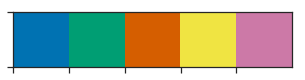

In [1]:
import sys
import os
from glob import glob
import random

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from openpyxl import load_workbook

from sinaplot import sinaplot

## Default plotting params

%matplotlib inline
sns.set(font='Arial')
plt.rcParams['svg.fonttype'] = 'none'
style = sns.axes_style('white')
style.update(sns.axes_style('ticks'))
style['xtick.major.size'] = 2
style['ytick.major.size'] = 2
sns.set(font_scale=2, style=style)
pal = sns.color_palette(['#0072b2', '#009e73', '#d55e00', '#f0e442', '#cc79a7'])
cmap = ListedColormap(pal.as_hex())
sns.set_palette(pal)
sns.palplot(pal)
plt.show()

In [2]:
exp1 = pd.read_excel(
    './methylation_Summary_file.xlsx',
    sheet_name='line graphs_01.04.15',
    header=1,
    usecols='B:CZ,DB',
    names=([f'WT_{i}' for i in range(49)] +
           [f'VIRc_{i}' for i in range(30)] +
           [f'vir-1_{i}' for i in range(24)] +
           ['hours']),
).set_index('hours')

exp1.head()

,WT_0,WT_1,WT_2,WT_3,WT_4,WT_5,WT_6,WT_7,WT_8,WT_9,...,vir-1_14,vir-1_15,vir-1_16,vir-1_17,vir-1_18,vir-1_19,vir-1_20,vir-1_21,vir-1_22,vir-1_23
hours,,,,,,,,,,,,,,,,,,,,,
8,0.991507,1.103634,1.084145,1.094708,1.069377,1.030279,1.037467,0.962419,0.979376,1.064552,...,0.957191,0.945204,0.946109,0.985546,0.971378,0.962048,0.973499,0.971453,0.980910,0.989247
9,1.004331,1.110065,1.086134,1.090981,1.071747,1.039137,1.040618,0.970849,0.990130,1.080247,...,0.972937,0.961216,0.964461,1.004536,0.989905,0.980828,0.988673,0.989630,1.000243,1.007507
10,1.019059,1.105610,1.078225,1.083600,1.068799,1.046600,1.043364,0.981614,1.005081,1.097097,...,0.981456,0.976193,0.977637,1.011575,0.999811,0.989369,0.992034,0.996799,1.010019,1.020831
11,1.015789,1.093562,1.064312,1.069823,1.058182,1.040150,1.036227,0.983942,1.002417,1.080730,...,0.988911,0.977956,0.982341,1.015161,1.003093,0.995601,0.998739,1.001839,1.015099,1.025217
12,1.013299,1.078433,1.047559,1.058714,1.047958,1.034969,1.029824,0.985236,0.999165,1.075623,...,0.991563,0.984616,0.989118,1.014967,1.005577,0.995660,1.002366,1.006004,1.016525,1.030071


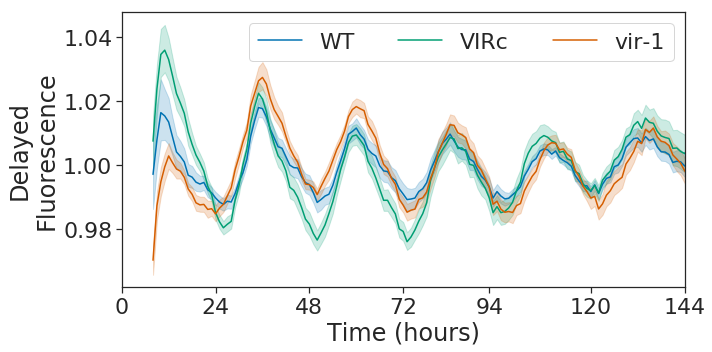

In [3]:
mean_df = pd.melt(
    exp1.reset_index(),
    id_vars=['hours'],
    var_name='replicate',
    value_name='delayed_fluorescence'
)
mean_df['condition'] = mean_df.replicate.str.split('_', expand=True)[0]

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    x='hours',
    y='delayed_fluorescence',
    hue='condition',
    hue_order=['WT', 'VIRc', 'vir-1'],
    data=mean_df,
    ax=ax,
    legend=False
)
for i, label in enumerate(['WT', 'VIRc', 'vir-1']):
    ax.plot([], [], color=pal[i], label=label)
ax.legend(loc=1, ncol=3)
xticks = [0, 24, 48, 72, 94, 120, 144]
ax.set_xticks(xticks)
ax.set_xlim(0, 144)

ax.set_xlabel('Time (hours)')
ax.set_ylabel('Delayed\nFluorescence')
plt.tight_layout()
plt.savefig('vir1_VIRc_delayed_fluorescence_expt1.svg')
plt.show()

In [4]:
exp2 = pd.read_excel(
    './methylation_Summary_file.xlsx',
    sheet_name='line graphs_20.03.15',
    header=1,
    usecols='B:DK,DM',
    names=([f'WT_{i}' for i in range(61)] +
           [f'VIRc_{i}' for i in range(29)] +
           [f'vir-1_{i}' for i in range(24)] +
           ['hours']),
).set_index('hours')

exp2.head()

,WT_0,WT_1,WT_2,WT_3,WT_4,WT_5,WT_6,WT_7,WT_8,WT_9,...,vir-1_14,vir-1_15,vir-1_16,vir-1_17,vir-1_18,vir-1_19,vir-1_20,vir-1_21,vir-1_22,vir-1_23
hours,,,,,,,,,,,,,,,,,,,,,
1.0,0.987768,0.995162,0.992492,0.977074,0.989410,0.976302,0.983719,1.002491,0.983884,0.970528,...,1.042952,0.985394,0.979208,1.040633,1.025936,1.037886,1.047311,1.043170,1.042126,0.989206
2.0,0.987655,0.988048,0.989327,0.977733,0.989149,0.982690,0.980532,0.998034,0.987045,0.975260,...,1.031285,0.986959,0.985196,1.027420,1.015445,1.024983,1.035047,1.029405,1.027078,0.988534
3.0,0.986388,0.984846,0.986623,0.978056,0.990075,0.981830,0.982033,0.995787,0.985465,0.977466,...,1.014322,0.981733,0.980755,1.017387,1.006468,1.013265,1.022925,1.017755,1.015105,0.982393
4.0,0.987996,0.984824,0.984031,0.983637,0.995145,0.987454,0.982656,0.993458,0.987163,0.983231,...,1.009209,0.986052,0.988168,1.014860,0.999479,1.008633,1.015059,1.008557,1.015623,0.984735
5.0,0.988981,0.987651,0.984666,0.984996,0.997618,0.994485,0.987550,0.995489,0.992435,0.988581,...,1.012415,0.988909,0.994612,1.015015,0.996815,1.005993,1.006758,1.006223,1.015094,0.986890


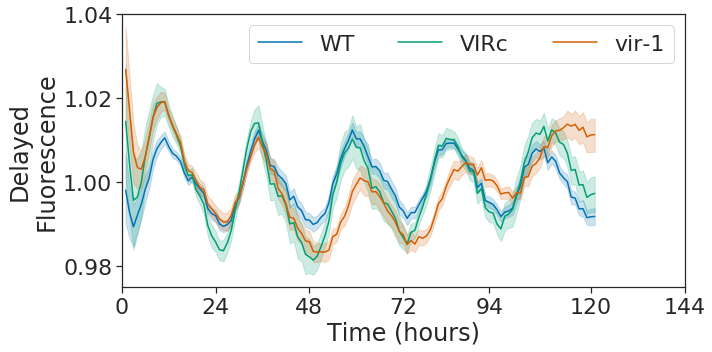

In [5]:
mean_df2 = pd.melt(
    exp2.reset_index(),
    id_vars=['hours'],
    var_name='replicate',
    value_name='delayed_fluorescence'
)
mean_df2['condition'] = mean_df2.replicate.str.split('_', expand=True)[0]

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    x='hours',
    y='delayed_fluorescence',
    hue='condition',
    hue_order=['WT', 'VIRc', 'vir-1'],
    data=mean_df2,
    ax=ax,
    legend=False
)
for i, label in enumerate(['WT', 'VIRc', 'vir-1']):
    ax.plot([], [], color=pal[i], label=label)
ax.legend(loc=1, ncol=3)
xticks = [0, 24, 48, 72, 94, 120, 144]
ax.set_xticks(xticks)
ax.set_xlim(0, 144)

ax.set_xlabel('Time (hours)')
ax.set_ylabel('Delayed\nFluorescence')
plt.tight_layout()
plt.savefig('vir1_VIRc_delayed_fluorescence_expt2.svg')
plt.show()

In [6]:
exp1_period = pd.read_excel(
    './methylation_Summary_file.xlsx',
    sheet_name='RAE_plots_01.04.15',
    skiprows=2, header=None,
    usecols=[1, 2, 3],
    names=['condition', 'period', 'gof']
)
exp1_period['condition'] = exp1_period.condition.str.split(':', expand=True)[0].map(
    {'VIR': 'VIRc', 'vir1': 'vir-1', 'Wild Type': 'WT'})
exp1_period.head()

,condition,period,gof
0,VIRc,23.89,0.418164
1,VIRc,24.15,0.519941
2,VIRc,24.15,0.278817
3,VIRc,24.48,0.615317
4,VIRc,23.87,0.273744


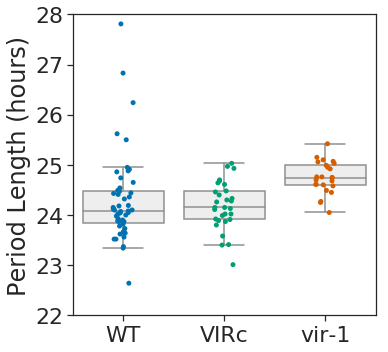

In [7]:
fig, ax = plt.subplots(figsize=(5.5, 5))
sns.boxplot(
    x='condition',
    y='period',
    color='#eeeeee',
    data=exp1_period,
    fliersize=0,
    order=['WT', 'VIRc', 'vir-1'],
    ax=ax
)
sns.stripplot(
    x='condition',
    y='period',
    data=exp1_period,
    order=['WT', 'VIRc', 'vir-1'],
    ax=ax,
)
ax.set_ylabel('Period Length (hours)')
ax.set_xlabel('')
ax.set_ylim(22, 28)
plt.tight_layout()
plt.savefig('vir1_VIRc_period_length_expt1.svg')
plt.show()

In [8]:
exp2_period = pd.read_excel(
    './methylation_Summary_file.xlsx',
    sheet_name='RAE_plots_20.03.15',
    skiprows=2, header=None,
    usecols=[1, 2, 3],
    names=['condition', 'period', 'gof']
)
exp2_period['condition'] = exp2_period.condition.str.split(':', expand=True)[0].map(
    {'VIR': 'VIRc', 'vir1': 'vir-1', 'Wild Type': 'WT'})
exp2_period.head()

,condition,period,gof
0,WT,23.84,0.270934
1,WT,24.07,0.350335
2,WT,24.22,0.360081
3,WT,24.58,0.422094
4,WT,24.32,0.356710


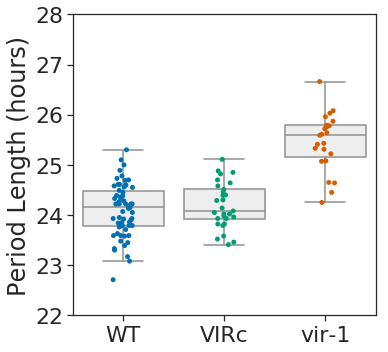

In [9]:
fig, ax = plt.subplots(figsize=(5.5, 5))
sns.boxplot(
    x='condition',
    y='period',
    color='#eeeeee',
    data=exp2_period,
    fliersize=0,
    order=['WT', 'VIRc', 'vir-1'],
    ax=ax
)
sns.stripplot(
    x='condition',
    y='period',
    data=exp2_period,
    order=['WT', 'VIRc', 'vir-1'],
    ax=ax,
)
ax.set_ylabel('Period Length (hours)')
ax.set_xlabel('')
ax.set_ylim(22, 28)
plt.tight_layout()
plt.savefig('vir1_VIRc_period_length_expt2.svg')
plt.show()

In [10]:
with pd.ExcelWriter('delayed_fluorescence_results.xlsx') as xlwrtr:
    exp1.to_excel(xlwrtr, sheet_name='experiment_1')
    exp2.to_excel(xlwrtr, sheet_name='experiment_2')
    exp1_period.to_excel(xlwrtr, sheet_name='experiment_1_period_length')
    exp2_period.to_excel(xlwrtr, sheet_name='experiment_2_period_length')